In [1]:
import importlib
import itertools
import torch
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F

from utils import layers, hooking, img, stats, models, losses, shift
from stepping import loss, closure

In [2]:
vgg = models.vgg19()

In [3]:
vgg

Sequential(
  (0): Normalization()
  (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): ReLU(inplace)
  (17): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU(inplace)
  (19): MaxPool2d(kernel_size=

In [4]:
hooker = hooking.Hooker(vgg)
hooker.attach_hooks("texture_hooks", [19])
hook_bag = hooker.get_bag()
vgg = layers.clipped_model(vgg, hooker.last_hooked_index())

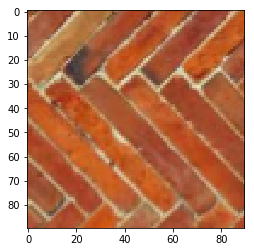

In [35]:
transform = transforms.Compose([
    transforms.RandomCrop(90),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/bricks.png", transform)
img.show_image(example_texture)

In [36]:
importlib.reload(losses)
importlib.reload(stats)
importlib.reload(shift)


vgg(example_texture)
target = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.deep_correlation_matrix)

number of tensors stored in memory: 45
number of tensors stored in memory: 45
number of tensors stored in memory: 45
number of tensors stored in memory: 45


In [61]:
importlib.reload(stats)
x = stats.deep_correlation_matrix(example_texture)

number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored 

number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored in memory: 62
number of tensors stored 

In [62]:
importlib.reload(stats)
stats.channel_normalize_(x)
x

tensor(1., device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')


tensor([[[[-4.7433e+00, -4.3716e+00, -4.0243e+00,  ...,  2.5835e+00,
            2.6559e+00,  2.6790e+00],
          [-4.5314e+00, -4.1766e+00, -3.7839e+00,  ...,  2.5766e+00,
            2.6281e+00,  2.6805e+00],
          [-4.2806e+00, -3.9826e+00, -3.6319e+00,  ...,  2.5957e+00,
            2.5632e+00,  2.5895e+00],
          ...,
          [ 2.6282e+00,  2.5766e+00,  2.5774e+00,  ..., -4.1766e+00,
           -4.5314e+00, -4.8038e+00],
          [ 2.6559e+00,  2.5835e+00,  2.5107e+00,  ..., -4.3716e+00,
           -4.7433e+00, -5.0636e+00],
          [ 2.6639e+00,  2.6308e+00,  2.5369e+00,  ..., -4.5908e+00,
           -4.9369e+00, -5.2680e+00]],

         [[ 6.3998e-01,  1.0383e+00,  1.3306e+00,  ..., -6.7134e-01,
           -7.8482e-01, -8.9604e-01],
          [ 2.5289e-01,  6.5496e-01,  1.1227e+00,  ..., -5.6914e-01,
           -7.7907e-01, -9.4174e-01],
          [ 1.2855e-02,  2.9808e-01,  7.4934e-01,  ..., -3.8614e-01,
           -7.5098e-01, -1.0178e+00],
          ...,
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


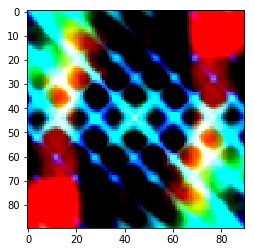

In [63]:
img.show_image(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


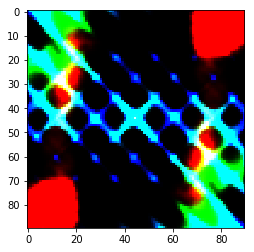

In [64]:
img.show_image(x ** 5)
img.save_image(x ** 5, "data/synth/xx.jpg")

torch.Size([1, 256, 11, 11])
torch.Size([1, 3, 11, 11])


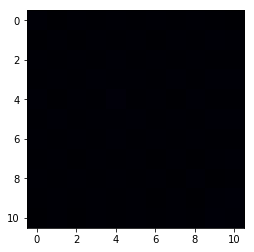

In [65]:
img.show_image(target[0][:, :3] / 100)
print(target[0].size())
print(target[0][:, :3].size())

In [66]:
dcorr_loss = loss.LossFn(target, hook_bag.get_hook("texture_hooks"), losses.deep_correlation_loss) 

In [67]:
collector = loss.LossCollector()
collector.add_loss_fn("texture", dcorr_loss)

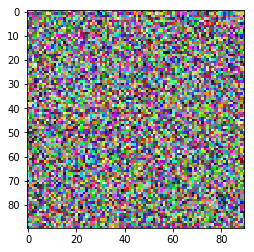

In [68]:
sample_texture = img.random_image(1, 90)
img.show_image(sample_texture)

inputs = {
    "input": sample_texture,
    "loss_name": "texture",
    "pyramid": False,
}

optimizer = optim.LBFGS([sample_texture], history_size=1)

In [69]:
stepper = closure.Stepper(inputs, vgg, collector, optimizer)

In [70]:
importlib.reload(stats)
importlib.reload(losses)

show_at = 1
for i in range(30):
    optimizer.step(stepper.loss_fn)
    
    img.save_image(sample_texture, "data/synth/lol{}.jpg".format(i))
    print(sample_texture.grad[0][0][0][:3])

number of tensors stored in memory: 64
number of tensors stored in memory: 64
number of tensors stored in memory: 64
number of tensors stored in memory: 64
tensor(0.0179, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.1862, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.0636, device='cuda:0', grad_fn=<StdBackward0>)
tensor(3.6266, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.2480, device='cuda:0', grad_fn=<StdBackward0>)
tensor(1.5194, device='cuda:0', grad_fn=<StdBackward0>)
tensor(3.3463, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.6837, device='cuda:0', grad_fn=<StdBackward0>)
tensor(10.7027, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.6452, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0., device='cuda:0', grad_fn=<StdBackward0>)
tensor(0., device='cuda:0', grad_fn=<StdBackward0>)
tensor(2.1749, device='cuda:0', grad_fn=<StdBackward0>)
tensor(0.7679, device='cuda:0', grad_fn=<StdBackward0>)
tensor(4.5819, device='cuda:0', grad_fn=<StdBackward0>)
tensor(4.42

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation

In [ ]:
img.show_image(sample_texture)

In [ ]:
vgg(sample_texture)
t = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.deep_correlation_matrix)
img.show_image(t[0][:, :3] /  30)
print(target[0].size())
print(target[0][:, :3].size())

In [43]:
x_displacements = list(range(-3, 3 + 1))
y_displacements = list(range(-3, 3 + 1))

[i for i in itertools.product(x_displacements, y_displacements)]

[(-3, -3),
 (-3, -2),
 (-3, -1),
 (-3, 0),
 (-3, 1),
 (-3, 2),
 (-3, 3),
 (-2, -3),
 (-2, -2),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-2, 2),
 (-2, 3),
 (-1, -3),
 (-1, -2),
 (-1, -1),
 (-1, 0),
 (-1, 1),
 (-1, 2),
 (-1, 3),
 (0, -3),
 (0, -2),
 (0, -1),
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, -3),
 (1, -2),
 (1, -1),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, -3),
 (2, -2),
 (2, -1),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, -3),
 (3, -2),
 (3, -1),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]